In [201]:
# from typing import List, Dict, Iterable, Tuple, Callable
from typing import *
from matplotlib import pyplot as plt
from collections import Counter
import pygal
import sys
import os
import string
import urllib.request
import requests
import curl
import pycurl
import webbrowser
import numpy as np
import math
import pandas as pd
# from IPython import qt
from matplotlib.pyplot import figure
from py.xml import raw
from requests.api import get

from sklearn import datasets, linear_model

from sklearn import *
from sklearn.model_selection import train_test_split
# from sklearn.cross_validation import train_test_split
# from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt



In [202]:
def scale(X, axis=0):
    new = X - np.mean(X, axis=0)
    return new / np.std(new, axis=0)


In [203]:
class LinearRegression(object):
    def __init__(self, eta=0.001, n_iter=50, fit_alg='sgd'):
        self.eta = eta
        self.n_iter = n_iter
        self.fit_alg = self.fit_sgd if fit_alg=='sgd' else self.fit_batch
        self.w = np.ones(X.shape[1])

    def fit(self, X, y):
        X = np.insert(X, 0, 1, axis=1)
        self.w = np.ones(X.shape[1])

        for _ in range(self.n_iter):
            self.fit_alg(X, y)

        return self

    def fit_batch(self, X, y):
        output = X.dot(self.w)
        errors = y - output
        self.w += self.eta * X.T.dot(errors)
        # print(sum(errors**2) / 2.0)

    def fit_sgd(self, X, y):
        X, y = self._shuffle(X, y)
        for x, target in zip(X, y):
            output = x.dot(self.w)
            errors = target - output
            self.w += self.eta * x.T.dot(errors)

    def _shuffle(self, X, y):
        r = np.random.permutation(len(y))
        return X[r], y[r]

    def predict(self, X):
        return np.insert(X, 0, 1, axis=1).dot(self.w)

    def score(self, X, y):
        return 1 - sum((self.predict(X) - y)**2) / sum((y - np.mean(y))**2)

In [204]:
class LinearRegressionNormal(object):
    def __init__(self):
        pass

    def fit(self, X, y):
        X = np.insert(X, 0, 1, axis=1)
        self.w_ = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
        return self

    def predict(self, X):
        return np.insert(X, 0, 1, axis=1).dot(self.w_)

    def score(self, X, y):
        return 1 - sum((self.predict(X) - y)**2) / sum((y - np.mean(y))**2)

In [205]:
class LinearRegressionSGD(object):
    def __init__(self, eta=0.1, n_iter=1500, shuffle=True):
        self.eta = eta
        self.n_iter = n_iter
        self.shuffle = shuffle

    def fit(self, X, y):
        X = np.insert(X, 0, 1, axis=1)
#         self.w = np.ones(X.shape[1])
        self.w = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)

        for _ in range(self.n_iter):
            if self.shuffle:
                X, y = self._shuffle(X, y)
            for x, target in zip(X, y):
                output = x.dot(self.w)
                error = target - output
                self.w += self.eta * error * x
        return self

    def _shuffle(self, X, y):
        r = np.random.permutation(len(y))
        return X[r], y[r]
    
    def predict(self, X):
        return np.insert(X, 0, 1, axis=1).dot(self.w)

    def score(self, X, y):
        return 1 - sum((self.predict(X) - y)**2) / sum((y - np.mean(y))**2)

In [206]:
diabetes = datasets.load_diabetes()
# Use only one feature
X = diabetes.data[:, np.newaxis, 2]
y = diabetes.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25)

In [207]:
regr = LinearRegression()
regr.fit_sgd(X_train,y_train)
regr.w

array([1.67398265])

In [208]:
regr = LinearRegressionSGD(eta=.001, n_iter=1500)
regr.fit(X_train, y_train)
regr.w

array([152.39290072, 946.07331263])

In [209]:
regr2 = LinearRegression(n_iter=1500)
regr2.fit_sgd(X_train,y_train)

In [210]:
regr2 = LinearRegression(n_iter=1500, fit_alg='sgd')
regr2.fit(X_train,y_train)

In [211]:
regr_normal = LinearRegressionNormal()
regr_normal.fit(X_train,y_train)
regr_normal.score(X_train,y_train)

0.3375094212910099

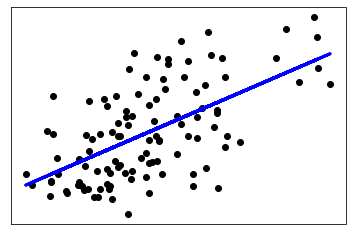

In [212]:
plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, regr_normal.predict(X_test), color='blue', linewidth=3)
plt.xticks(())
plt.yticks(())
plt.show()